In [1]:
import os
import sys
#import pandas_profiling as pp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Importing Libraries

In [2]:
First= pd.read_excel('Desktop/all_frog_data.xlsx')
#Importing the all_frog_data file and assigning it the variable First

C:\Users\M-ELITE TECHNOLOGIES\AppData\Local\Temp\ipykernel_12564\855806008.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  First= pd.read_excel('Desktop/all_frog_data.xlsx')


In [3]:
First
#Calling the First File

,Unnamed: 0,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species
0,0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax
1,1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas
2,2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas
3,3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas
4,4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax
...,...,...,...,...,...,...,...,...,...
193786,193786,1322002619,NaT,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus
193787,193787,1319899134,1937-04-01 00:00:00,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus
193788,193788,1318901755,1937-04-05 00:00:00,Panama,Central America,PanamÃ¡,8.791700,-79.561100,Dendrobates Auratus
193789,193789,1322299951,2002-07-09 00:00:00,Honduras,Central America,Gracias a Dios,15.091100,-83.557800,Agalychnis Callidryas


In [4]:
First.info()
# Checking the Information of the columns to help Know where to group each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193791 entries, 0 to 193790
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        193791 non-null  int64         
 1   gbifID            193791 non-null  int64         
 2   eventDate         185026 non-null  datetime64[ns]
 3   country           193791 non-null  object        
 4   continent         193791 non-null  object        
 5   stateProvince     193099 non-null  object        
 6   decimalLatitude   193791 non-null  float64       
 7   decimalLongitude  193791 non-null  float64       
 8   species           193791 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 13.3+ MB


Column 0 and Column 1 are intergers, columns 6 and 7 have decimal values whiles columns column 3,4 and 8 are values with columns 2 is datetime. Grouping them, we have 5 numerical columns and 4 categorical columns.   

In [5]:
del First['Unnamed: 0']
# Deleting the Unnamed column

The Unnamed: 0 columns was deleted because it was a repetition of the number of rows and therefere not needed. 

In [6]:
First
#Calling the file again to make sure the command issued was carried out.

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species
0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax
1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas
2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas
3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas
4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax
...,...,...,...,...,...,...,...,...
193786,1322002619,NaT,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus
193787,1319899134,1937-04-01 00:00:00,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus
193788,1318901755,1937-04-05 00:00:00,Panama,Central America,PanamÃ¡,8.791700,-79.561100,Dendrobates Auratus
193789,1322299951,2002-07-09 00:00:00,Honduras,Central America,Gracias a Dios,15.091100,-83.557800,Agalychnis Callidryas


Unnamed: 0 has been removed 

In [7]:
Second= pd.read_excel('Desktop/All_MLOut_new.xlsx')
#Calling the second file and assigning it the variable Second

In [8]:
Second 
#Calling the Second file uploaded 

,Unnamed: 0,gbifID,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,0,2574007008,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,1,3457021422,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,2,1571195309,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,3,2265778539,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,4,3407962690,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,193786,1322002619,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,193787,1319899134,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,193788,1318901755,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,193789,1322299951,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


In [9]:
Second.info()
# Checking the Information of the columns to help Know where to group each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193791 entries, 0 to 193790
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        193791 non-null  int64  
 1   gbifID            193791 non-null  int64  
 2   country           193791 non-null  object 
 3   continent         193791 non-null  object 
 4   decimalLatitude   193791 non-null  float64
 5   decimalLongitude  193791 non-null  float64
 6   species           193791 non-null  object 
 7   occurrenceStatus  193791 non-null  int64  
 8   key               193791 non-null  int64  
 9   ppt_mean          161812 non-null  float64
 10  soil_mean         161812 non-null  float64
 11  tmax_mean         161812 non-null  float64
 12  tmin_mean         161812 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 19.2+ MB


There are no missing values within the dataframe and the dataframe has columns with decimals, whole numbers and objects  

In [10]:
del Second['Unnamed: 0'], Second['key']
#Deleting the Unnamed column and the key column since they are a repetition of the number of rows 

The Unnamed: 0 columns was deleted because it was a repetition of the number of rows and therefere not needed.

In [11]:
Second
#Calling the Second File again 

,gbifID,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,96.00000,118.71667,23.830004,13.908336
1,3457021422,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,231.51666,131.88333,31.841667,21.111668
2,1571195309,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,279.20000,51.70000,31.341671,22.455004
3,2265778539,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,192.10000,171.81667,31.043331,20.061670
4,3407962690,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193787,1319899134,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193788,1318901755,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193789,1322299951,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,190.06667,141.43333,29.326668,23.588335


In [12]:
Merge=pd.merge(First,Second, on='gbifID')
# merging both datasets on the gbifID column

In [13]:
Merge
#Calling the merge dataset after merging 

,gbifID,eventDate,country_x,continent_x,stateProvince,decimalLatitude_x,decimalLongitude_x,species_x,country_y,continent_y,decimalLatitude_y,decimalLongitude_y,species_y,occurrenceStatus,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,96.00000,118.71667,23.830004,13.908336
1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,231.51666,131.88333,31.841667,21.111668
2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,279.20000,51.70000,31.341671,22.455004
3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,192.10000,171.81667,31.043331,20.061670
4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaT,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193787,1319899134,1937-04-01 00:00:00,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193788,1318901755,1937-04-05 00:00:00,Panama,Central America,PanamÃ¡,8.791700,-79.561100,Dendrobates Auratus,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193789,1322299951,2002-07-09 00:00:00,Honduras,Central America,Gracias a Dios,15.091100,-83.557800,Agalychnis Callidryas,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,190.06667,141.43333,29.326668,23.588335


In [14]:
Merge.info()
#Checking the information of the columns to know the datatype of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   gbifID              193791 non-null  int64         
 1   eventDate           185026 non-null  datetime64[ns]
 2   country_x           193791 non-null  object        
 3   continent_x         193791 non-null  object        
 4   stateProvince       193099 non-null  object        
 5   decimalLatitude_x   193791 non-null  float64       
 6   decimalLongitude_x  193791 non-null  float64       
 7   species_x           193791 non-null  object        
 8   country_y           193791 non-null  object        
 9   continent_y         193791 non-null  object        
 10  decimalLatitude_y   193791 non-null  float64       
 11  decimalLongitude_y  193791 non-null  float64       
 12  species_y           193791 non-null  object        
 13  occurrenceStatus    193791 no

In [15]:
Merge.duplicated()
# Checking for the columns that have been duplicated 

0         False
1         False
2         False
3         False
4         False
          ...  
193786    False
193787    False
193788    False
193789    False
193790    False
Length: 193791, dtype: bool

There are no duplicate columns 

In [16]:
Merge.describe()
# This is to get the numerical columns since ;describe' only produces results from numerical columns 

,gbifID,decimalLatitude_x,decimalLongitude_x,decimalLatitude_y,decimalLongitude_y,occurrenceStatus,ppt_mean,soil_mean,tmax_mean,tmin_mean
count,1.937910e+05,193791.000000,193791.000000,193791.000000,193791.000000,193791.000000,161812.000000,161812.000000,161812.000000,161812.000000
mean,2.538989e+09,-32.581960,140.655139,-32.581960,140.655139,0.244243,68.193053,55.523826,22.698504,11.160806
std,1.009713e+09,7.801278,35.361322,7.801278,35.361322,0.429638,31.459189,49.908966,3.474586,3.455892
min,4.507536e+07,-43.766700,-99.221738,-43.766700,-99.221738,0.000000,0.766667,0.000000,10.465001,0.758334
25%,1.637104e+09,-36.000000,144.589529,-36.000000,144.589529,0.000000,49.183334,21.400000,20.305002,8.675002
50%,3.108886e+09,-33.835933,149.974250,-33.835933,149.974250,0.000000,64.600000,47.416668,22.778334,11.245001
75%,3.463558e+09,-32.289586,151.194731,-32.289586,151.194731,0.000000,77.900000,69.066666,24.218334,12.721667
max,3.469585e+09,21.349444,153.636442,21.349444,153.636442,1.000000,368.750000,403.716670,37.401672,25.253334


From the table above, it is clear that decimalLatitude_x and decimalLatitude_y are same and decimalLongitude_x and decimalLongitude_y are also same so therefore need to be deleted.  The measure of spread and the measure of central tendecies were also calculted.

In [17]:
del Merge['decimalLatitude_x'], Merge['decimalLongitude_x'], Merge['species_y'], Merge['country_x'], Merge['continent_x']

#deleting one of each columns that have been repeated 

In [18]:
Merge 
#This is to check if change has taken effect

,gbifID,eventDate,stateProvince,species_x,country_y,continent_y,decimalLatitude_y,decimalLongitude_y,occurrenceStatus,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,2020-01-23 01:38:00,New South Wales,Litoria Fallax,Australia,Australia,-32.719457,152.159267,1,96.00000,118.71667,23.830004,13.908336
1,3457021422,2010-03-14 22:23:00,Puntarenas,Agalychnis Callidryas,Costa Rica,Central America,8.496999,-83.318613,0,231.51666,131.88333,31.841667,21.111668
2,1571195309,2014-04-11 19:51:57,Heredia,Agalychnis Callidryas,Costa Rica,Central America,10.450801,-84.068659,0,279.20000,51.70000,31.341671,22.455004
3,2265778539,2018-07-21 21:24:21,Puntarenas,Agalychnis Callidryas,Costa Rica,Central America,9.756705,-84.613363,0,192.10000,171.81667,31.043331,20.061670
4,3407962690,2021-10-29 13:57:00,Queensland,Litoria Fallax,Australia,Australia,-26.714302,152.815096,1,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaT,PanamÃ¡,Dendrobates Auratus,Panama,Central America,8.806900,-79.515300,0,158.16667,214.81667,31.203335,24.071667
193787,1319899134,1937-04-01 00:00:00,PanamÃ¡,Dendrobates Auratus,Panama,Central America,8.806900,-79.515300,0,158.16667,214.81667,31.203335,24.071667
193788,1318901755,1937-04-05 00:00:00,PanamÃ¡,Dendrobates Auratus,Panama,Central America,8.791700,-79.561100,0,158.16667,214.81667,31.203335,24.071667
193789,1322299951,2002-07-09 00:00:00,Gracias a Dios,Agalychnis Callidryas,Honduras,Central America,15.091100,-83.557800,0,190.06667,141.43333,29.326668,23.588335


The repeated rows have ben deleted 

# Univariate Analysis

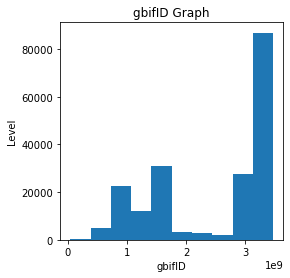

In [19]:
plt.figure(figsize=(4,4))
plt.hist(Merge['gbifID'], bins=10)
plt.title('gbifID Graph')
plt.xlabel('gbifID')
plt.ylabel('Level')
plt.show()
#Plotting a histogram of the gbiFID column

The gbifID was not evenly distributed 

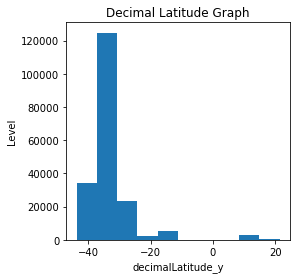

In [20]:
plt.figure(figsize=(4,4))
plt.hist(Merge['decimalLatitude_y'], bins=10)
plt.title('Decimal Latitude Graph')
plt.xlabel('decimalLatitude_y')
plt.ylabel('Level')
plt.show()
#Plotting a histogram of the decimalLatitude_y

location according to latitude was not even distributed but concerntrated at one place

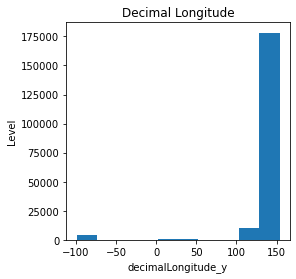

In [21]:
plt.figure(figsize=(4,4))
plt.hist(Merge['decimalLongitude_y'], bins=10)
plt.title('Decimal Longitude')
plt.xlabel('decimalLongitude_y')
plt.ylabel('Level')
plt.show()
#Plotting a histogram of the decimalLongitude_y column

location according to longitude was not even distributed but concerntrated at one place

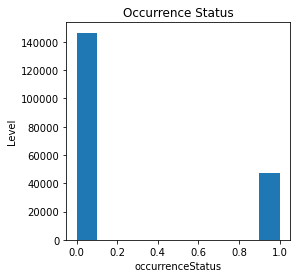

In [22]:
plt.figure(figsize=(4,4))
plt.hist(Merge['occurrenceStatus'], bins=10)
plt.title('Occurrence Status')
plt.xlabel('occurrenceStatus')
plt.ylabel('Level')
plt.show()
#Plotting a histogram of the occurrenceStatus column

The appearing of frog species is heavely concentrated at one place and then a lot lesser at another point and hardly shown anywhere else. 

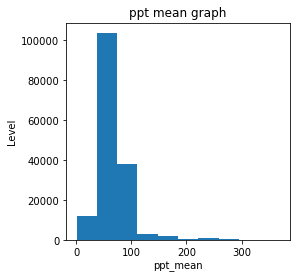

In [23]:
plt.figure(figsize=(4,4))
plt.hist(Merge['ppt_mean'], bins=10)
plt.title('ppt mean graph')
plt.xlabel('ppt_mean')
plt.ylabel('Level')
plt.show()
#Plotting a histogram of the ppt_mean column

The population mean of the frogs is heavily distributed at a particular region, significantly reduced at the next highest and continuously reduced across places. 

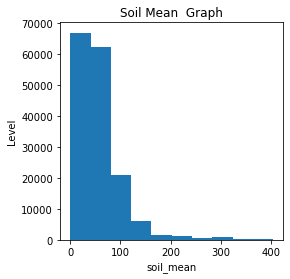

In [24]:
plt.figure(figsize=(4,4))
plt.hist(Merge['soil_mean'], bins=10)
plt.title('Soil Mean  Graph')
plt.xlabel('soil_mean')
plt.ylabel('Level')
plt.show()
#Plotting a histogram of the soil_mean column

The soil mean dropped steadily across two places and greatly across other places as seen by the bins 

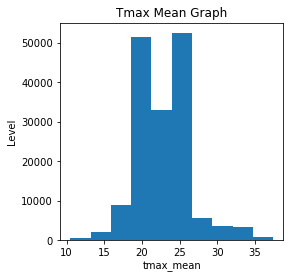

In [25]:
plt.figure(figsize=(4,4))
plt.hist(Merge['tmax_mean'], bins=10)
plt.title('Tmax Mean Graph')
plt.xlabel('tmax_mean')
plt.ylabel('Level')
plt.show()
#Plotting a histogram of the tmax_mean column

The maximum temperature increases across places then suddenly short up and then down and up again. And then dropped greatly and then steadily across places. 

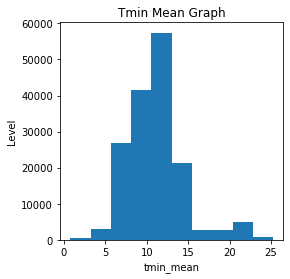

In [26]:
plt.figure(figsize=(4,4))
plt.hist(Merge['tmin_mean'], bins=10)
plt.title('Tmin Mean Graph')
plt.xlabel('tmin_mean')
plt.ylabel('Level')
plt.show()
#Plotting a histogram of the tmin_mean column

According to the graph, the spread of the frogs at minimum temperature started at a low point then increased suddenly across places. Dropped suddenly and steadly across places, was maintained a bit and then increased and decreased. 

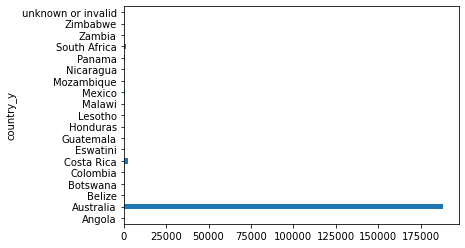

In [39]:
Merge.groupby('country_y').country_y.count().plot(kind='barh')
plt.show()
#plotting a bar chart 

Australia has a lot of frog species, followed by Costa Rica with verr little and the rest hardly having anything. 

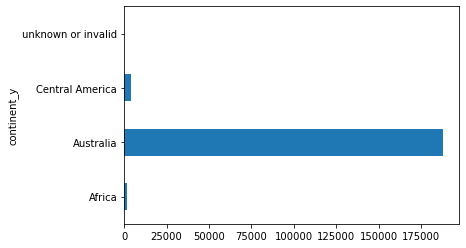

In [28]:
Merge.groupby('continent_y').continent_y.count().plot(kind='barh')
plt.show()

Australia is the coontinent with the highest frog species, followed by Central America and then Africa.

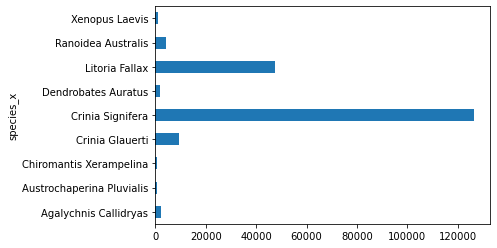

In [29]:
Merge.groupby('species_x').species_x.count().plot(kind='barh')
plt.show()

Crinia Signifera is the highest frog species found, followed by Litoria Fallax, then Ranoidea Australis and the rest.

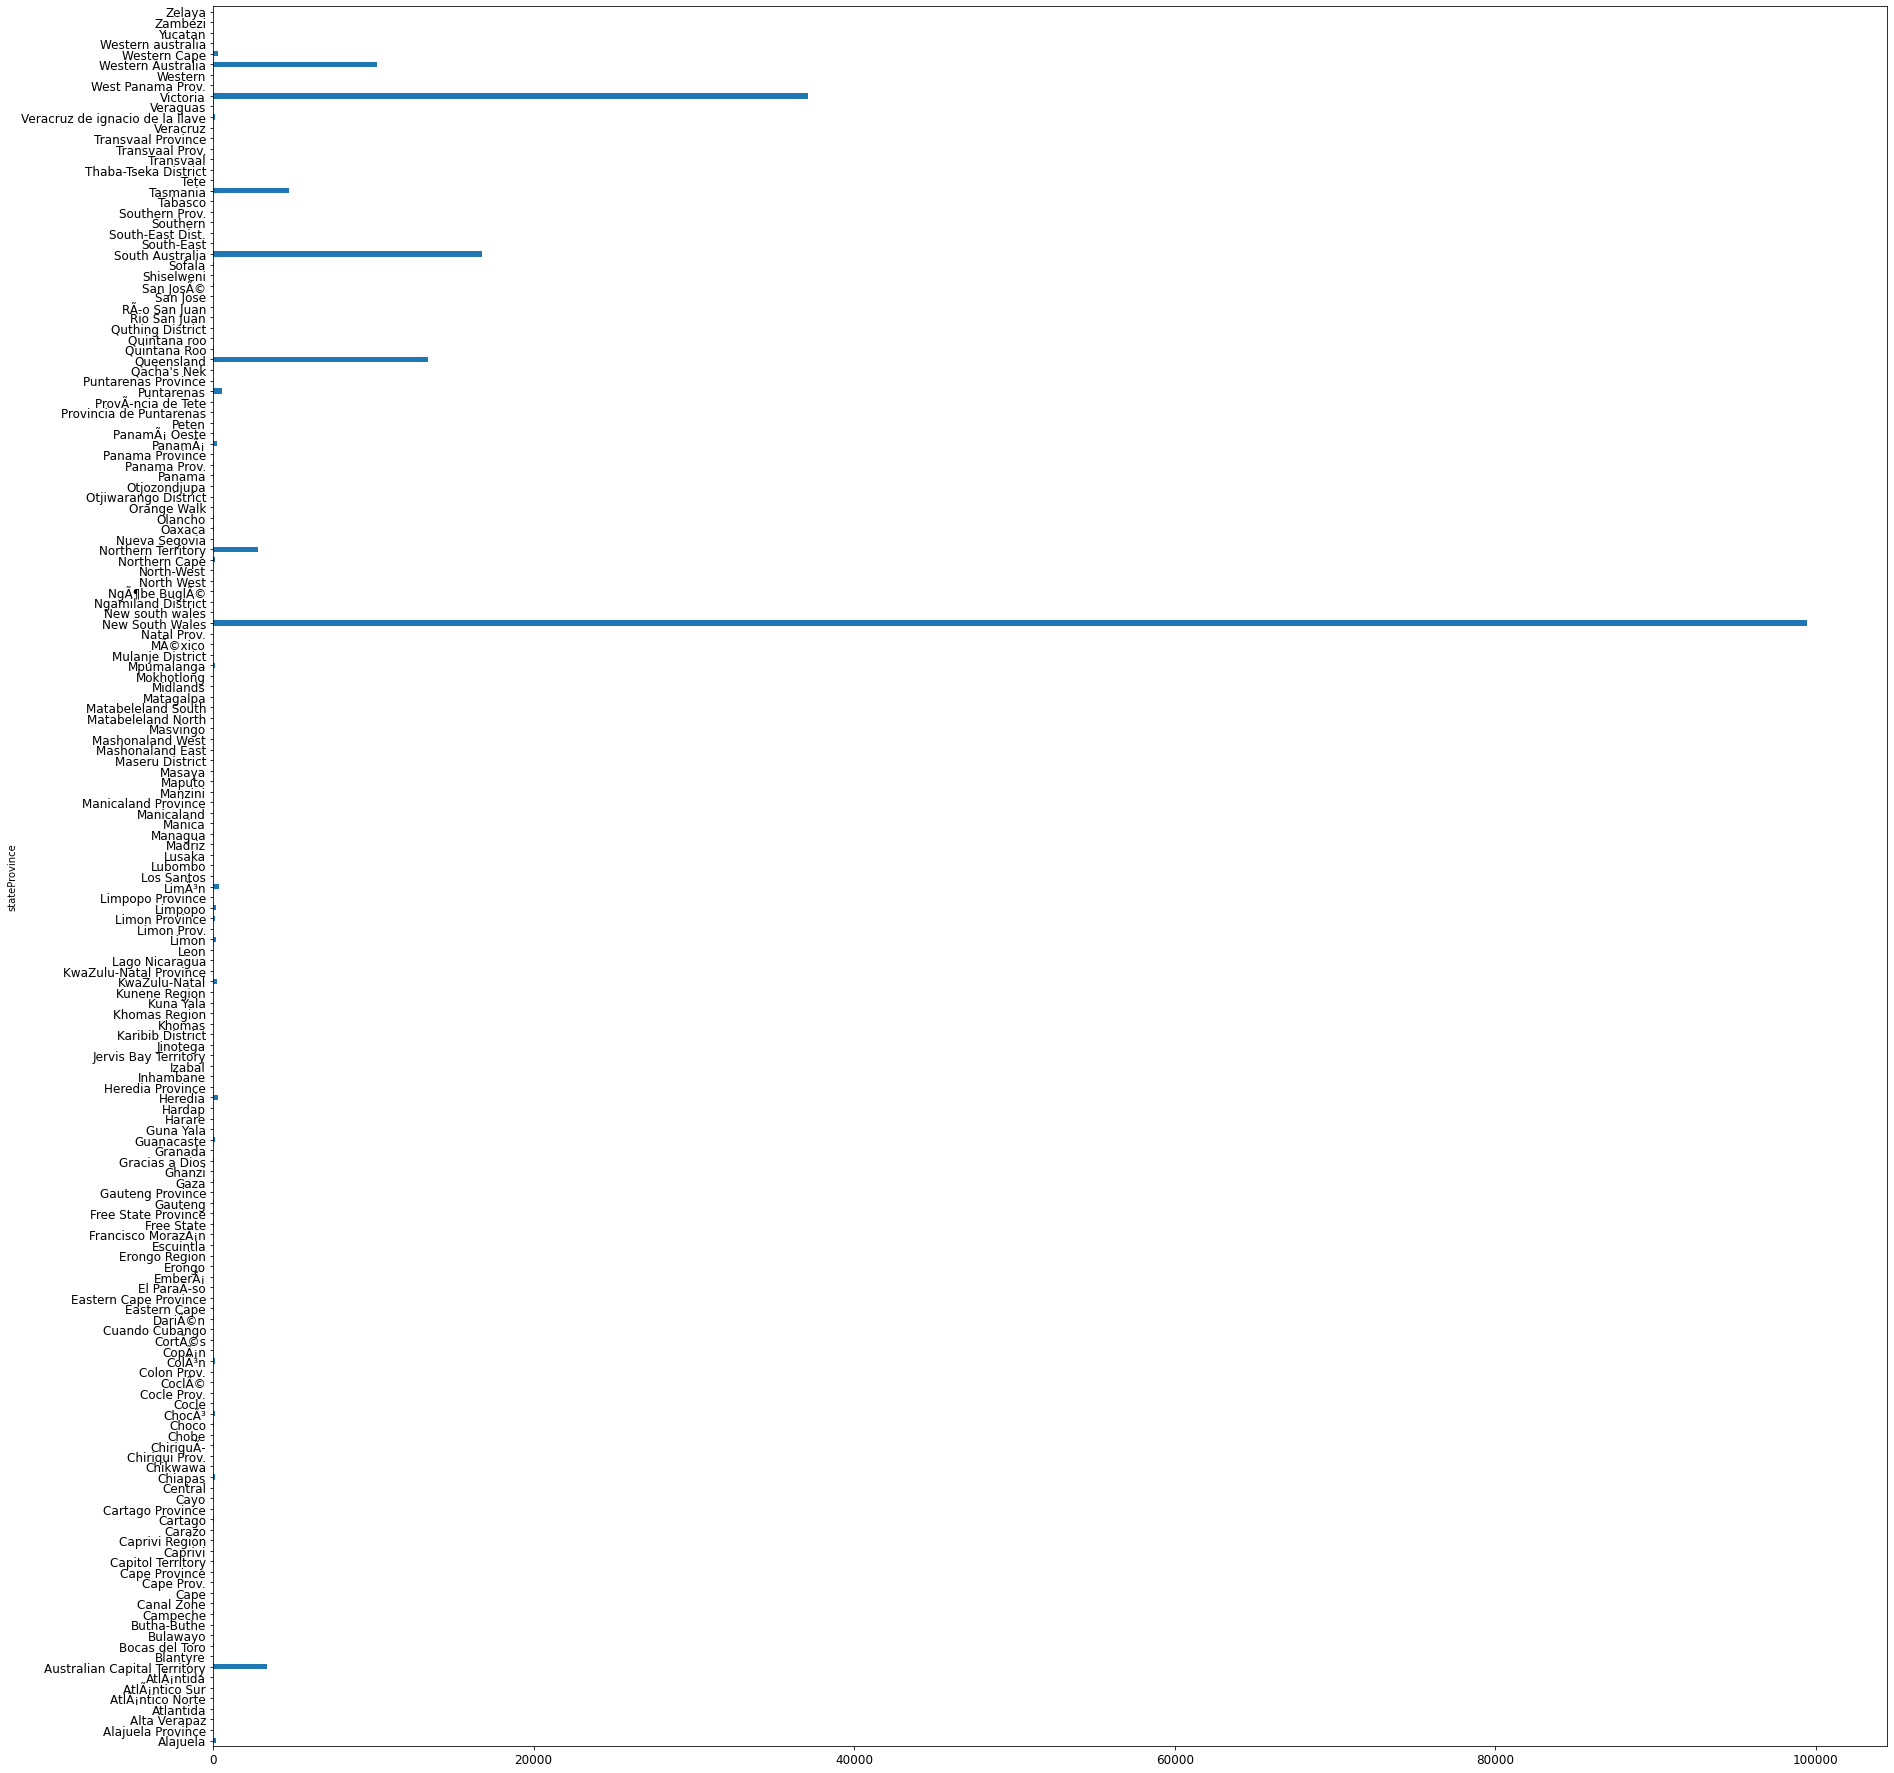

In [30]:
Merge.groupby('stateProvince').stateProvince.count().plot(kind='barh', figsize=(30,32), fontsize=12)
plt.show()

# Multivariate Analysis

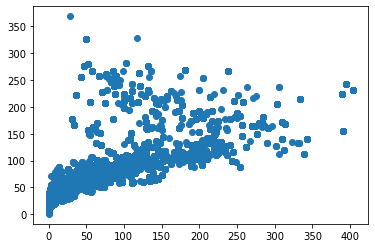

In [40]:
plt.scatter(Merge['soil_mean'], Merge['ppt_mean'])
plt.show()
#plotting a scatter plot of soil_mean and ppt_mean

The population mean is densely distributed in a particular point in the soil and then starts to spread pot more as the soil mean increases. 

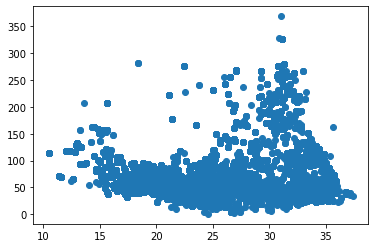

In [41]:
plt.scatter(Merge['tmax_mean'], Merge['ppt_mean'])
plt.show()
#Plotting a scatter plot of tmax_mean and ppt_mean

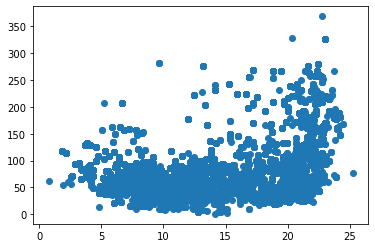

In [42]:
plt.scatter(Merge['tmin_mean'], Merge['ppt_mean'])
plt.show()
#Plotting a scatter plot of tmin_mean and ppt_mean

In [43]:
Merge.corr()
#Finding the correlation of the dataframe

,gbifID,decimalLatitude_y,decimalLongitude_y,occurrenceStatus,ppt_mean,soil_mean,tmax_mean,tmin_mean
gbifID,1.000000,-0.089440,0.083634,0.065295,-0.035870,0.014492,-0.074687,-0.065943
decimalLatitude_y,-0.089440,1.000000,-0.769068,0.117991,0.691287,0.494594,0.741601,0.753367
decimalLongitude_y,0.083634,-0.769068,1.000000,0.173562,-0.495477,-0.176682,-0.374161,-0.441033
occurrenceStatus,0.065295,0.117991,0.173562,1.000000,0.182467,0.235362,0.298881,0.296748
ppt_mean,-0.035870,0.691287,-0.495477,0.182467,1.000000,0.748893,0.338271,0.499807
soil_mean,0.014492,0.494594,-0.176682,0.235362,0.748893,1.000000,0.336955,0.468106
tmax_mean,-0.074687,0.741601,-0.374161,0.298881,0.338271,0.336955,1.000000,0.908567
tmin_mean,-0.065943,0.753367,-0.441033,0.296748,0.499807,0.468106,0.908567,1.000000


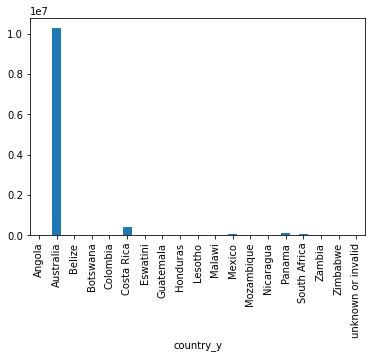

In [44]:
Merge.groupby('country_y').ppt_mean.sum().plot(kind='bar')
plt.show()
#Plotting a graph of country_y againt ppt.mean

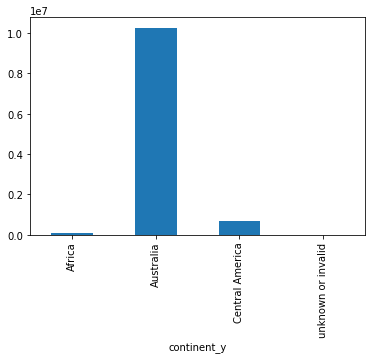

In [36]:
Merge.groupby('continent_y').ppt_mean.sum().plot(kind='bar')
plt.show()
#Plotting the column continent_y against ppt_mean